# Breast Cancer Dataset
# This is an example script that uses the Breast Cancer Wisconsin dataset (https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))  To search for the dataset, just type in the key words: breat cancer, 

###############################################################
## what we apply in this project:
#
### K-Nearest Neighbors
## Logistic Regresssssion
## Decision Tree
## Random Forests
## Neural Network
## Support Vector Machine

##  Please be sure to run conda installation for python-graphviz. 
## conda install python-graphviz


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
import sklearn.datasets
from sklearn.neighbors import KNeighborsClassifier     #KNN
from sklearn.linear_model import LogisticRegression    #Logistic Regression
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier       #Neural Network
from sklearn.svm import SVC                            #SVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import matplotlib.pylab as plt
import numpy as np
import graphviz

%matplotlib inline

In [3]:
diabetes = load_diabetes()
print(diabetes.DESCR)
print(diabetes.target)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [2]:
#load the breast cancer data and few EDA
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
print(cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [5]:
print(cancer.target_names)

['malignant' 'benign']


In [6]:
cancer.data[0:10]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [8]:
type(cancer.data)

numpy.ndarray

In [9]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. If ``train_size`` is also Non

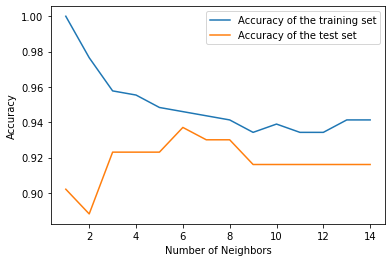

In [10]:
#----------KNN Classifier 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,15)

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

#by looking at plot, best result accurs when n_neighbors is 6

In [11]:
help(knn.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.neighbors._classification.KNeighborsClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [12]:
print("Accuracy of the training set for 6 NN: {:3f}".format(training_accuracy[5]))
print("Accuracy of the test set for 6 NN: {:3f}".format(test_accuracy[5]))

Accuracy of the training set for 6 NN: 0.946009
Accuracy of the test set for 6 NN: 0.937063


In [13]:
#----------------Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.4f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the testing set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#It seems as it does better than KNN

Accuracy on the training set: 0.9484
Accuracy on the testing set: 0.958


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Print out the coefficients of logistic coefficients
print('Coefficients: \n', log_reg.coef_)

Coefficients: 
 [[ 0.90271574  0.39495701  0.22398243 -0.01036807 -0.0364383  -0.16724292
  -0.23338592 -0.09609482 -0.05810734 -0.01241634  0.03693269  0.38490462
   0.15652013 -0.10293145 -0.0033875  -0.03827229 -0.05344879 -0.01283292
  -0.01452516 -0.00347478  0.90203357 -0.45671412 -0.1852263  -0.01769782
  -0.06606127 -0.54714008 -0.68236645 -0.19164468 -0.18098958 -0.05384866]]


In [15]:
probs = log_reg.predict_proba(X_test)
predicted_labels=log_reg.predict(X_test)
print ("Class \"", cancer.target_names[predicted_labels[0]], "\":" ,probs[0][predicted_labels[0]])   # print the predicted result of the first test instance

Class " benign ": 0.9792030587101959


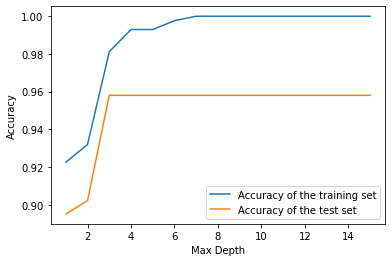

In [16]:
#----------------- Decision Tree
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

training_accuracy = []
test_accuracy = []

max_dep = range(1,16)

for md in max_dep:
    my_decision_tree = DecisionTreeClassifier(max_depth=md,random_state=0, criterion="entropy") #"entropy" "gini"
    my_decision_tree.fit(X_train,y_train)
    training_accuracy.append(my_decision_tree.score(X_train, y_train))
    test_accuracy.append(my_decision_tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(max_dep,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# By having larger max_depth (>5), we overfit the model into training data, so the accuracy for training set become 
# but the accuracy for test set decrease

# other parameters than can work with:
# - min_samples_leaf, max_sample_leaf
# - max_leaf_node

# by looking at plot, best result accurs when max_depth is 

In [17]:
help(my_decision_tree.score)

Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.tree._classes.DecisionTreeClassifier instance
    Return the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.



In [18]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

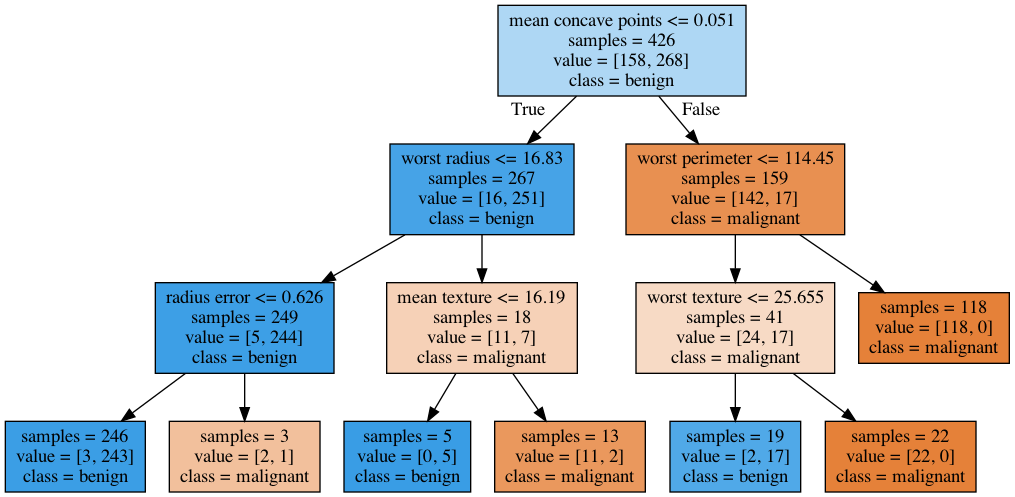

In [19]:
import os
from IPython.display import Image
# BEFORE YOU DRAW THIS TREE, YOU NEED TO LOAD IN GRAPHVIZ MODULE. 
tree.export_graphviz(my_decision_tree, out_file='cancerTree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)
os.system("dot -T png " + "cancerTree.dot" + " -o " + "cancerTree" + ".png")
Image(filename= "cancerTree.png")



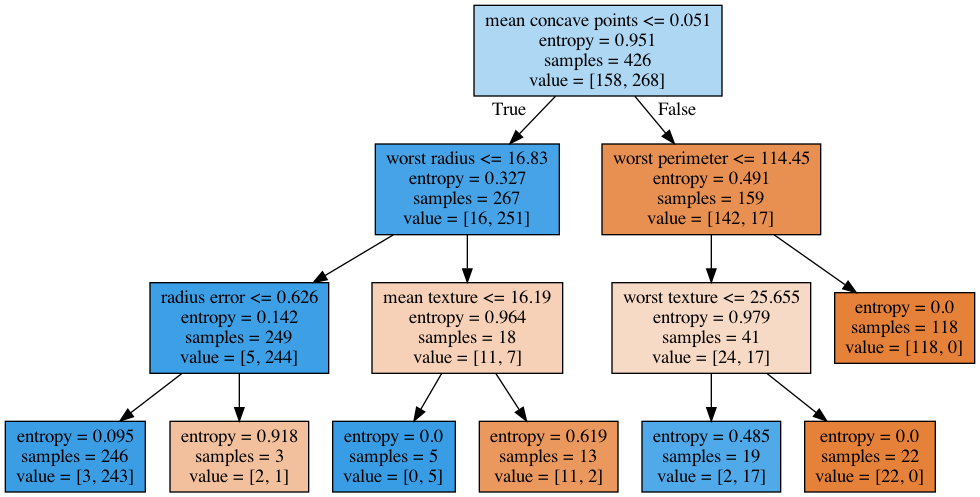

In [20]:
import os
#from sklearn import tree
from IPython.display import Image
#export_graphviz(tree, out_file='cancerTree.dot', class_names=['malignant','benign'], feature_names=cancer.feature_names, impurity=False, filled=True)

# A function that gives a visual representation of the decision tree

def Decision_Tree_Image(decision_tree, feature_names, name="temp"):
    
    # Export our decision tree to graphviz format
    dot_file = tree.export_graphviz(decision_tree, out_file=name + '.dot', feature_names=feature_names, filled=True)
    
    # Call graphviz to make an image file from our decision tree
    os.system("dot -T png " + name + ".dot -o " + name + ".png")
    
    # Return the .png image so we can see it
    return Image(filename= name + '.png')

#Let's print an image with the results
Decision_Tree_Image(my_decision_tree, cancer.feature_names)



In [21]:
print('Feature importances: {}'.format(my_decision_tree.feature_importances_))
type(my_decision_tree.feature_importances_)

Feature importances: [0.         0.02295084 0.         0.         0.         0.
 0.         0.59201781 0.00679754 0.         0.02270496 0.
 0.         0.         0.         0.01101566 0.         0.01986781
 0.         0.         0.0855317  0.09815693 0.09342687 0.
 0.01072974 0.         0.01404099 0.02275913 0.         0.        ]


numpy.ndarray

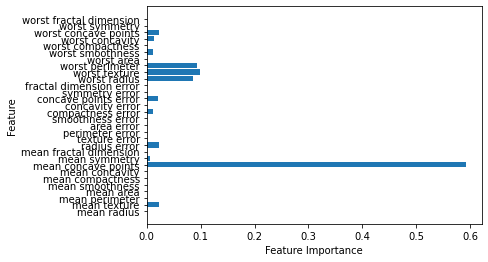

In [22]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), my_decision_tree.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [22]:
# Decision Tress perform well and we don't need to standardize features
# But as you see, it can easilly overfit 

In [23]:
# ---------------- Random Forests
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest = RandomForestClassifier(n_estimators=100, random_state=0, criterion="gini")
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))


acc for training data: 1.000
acc for test data: 0.972


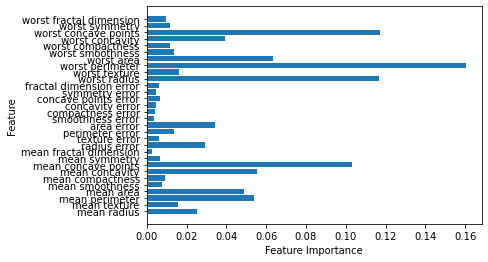

In [24]:
#Feature Importance
n_feature = cancer.data.shape[1]
plt.barh(range(n_feature), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_feature), cancer.feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [25]:
# Random Forest perform well and we don't need to standardize features
# Better than DT because of randomization
# It may not work well with sparse data

In [26]:
# ------------- Neural Network
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

acc for training data: 0.939
acc for test data: 0.916


In [27]:
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

In [28]:
print('The max per each feature:\n{}'.format(cancer.data.max(axis=0)))

The max per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [29]:
#let's improve on the Nearest Neighbor

#1- Scaling X data, let us standandize the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)

X_test_scaled = scaler.fit(X_train).transform(X_test)

print('The max per each feature:\n{}'.format(X_train_scaled.max(axis=0)))
print('The max per each feature:\n{}'.format(X_test_scaled.max(axis=0)))

The max per each feature:
[ 3.93179406  3.5400153   3.94763309  5.11826642  3.49269239  4.10343117
  4.31174808  3.92170223  4.46590352  5.08792003  8.60510904  6.73170851
  9.29407305 10.3491437   5.7886735   4.79720549 11.59761511  6.95731426
  5.00715477  9.94484456  4.03414639  3.94582347  4.23699685  5.74792023
  3.93375882  5.30687697  4.95908146  2.6703755   5.91848551  6.97408433]
The max per each feature:
[2.55081581 4.86840179 2.51371086 2.80994444 4.843984   4.77505487
 4.30664768 3.43424891 3.98144892 4.73433864 3.36507458 4.46261765
 3.99608321 2.80248527 8.55137018 6.50792273 3.56875682 4.94403713
 7.14192346 6.93405242 3.00531873 3.17488459 2.92823434 3.51114426
 2.51912396 4.48101793 4.5452017  2.68105574 4.02343478 3.43527489]


## In Scikit Learn,  Neural Network is termed "multilayer perceptron (MLP)"

In [30]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 1.000
acc for test data: 0.965


In [31]:
mlp

MLPClassifier(max_iter=1000, random_state=42)

In [32]:
#2- change alpha
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled,y_train)
print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

acc for training data: 0.986
acc for test data: 0.979


In [33]:
#we can play around with other hyper parameter to improve the performance

100


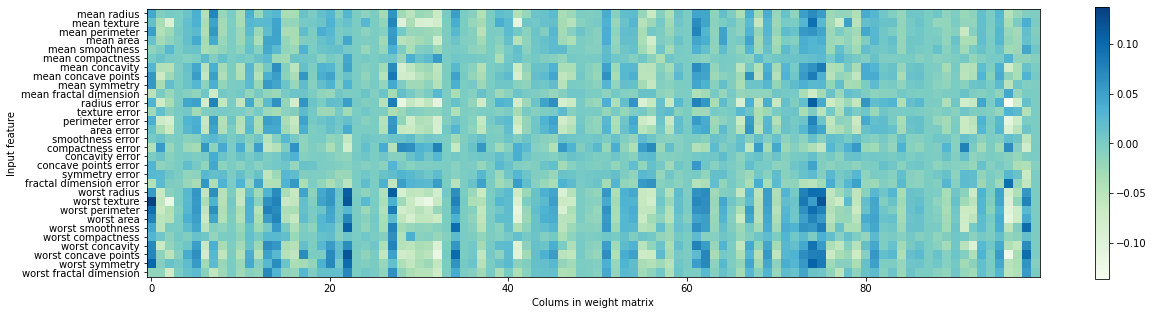

In [34]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0],interpolation='None',cmap='GnBu')
print(len(mlp.coefs_[0][0]))
plt.yticks(range(30),cancer.feature_names)
plt.xlabel('Colums in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

In [35]:
# --------- SVM (Support Vector Machine)
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=98)

svm= SVC()
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))

acc on train dataset: 0.913
acc on test dataset: 0.944


In [36]:
#it mean we overfit into our train dataset
# we can change hyper parameter to improve the model
# one way it to apply scaling
print(X_train.min(axis=0))
print(X_train.max(axis=0))

[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 2.344e-02 0.000e+00
 0.000e+00 1.060e-01 4.996e-02 1.115e-01 3.602e-01 8.730e-01 7.228e+00
 1.713e-03 4.660e-03 0.000e+00 0.000e+00 7.882e-03 9.502e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 1.535e-01 4.090e-02 5.628e-02 2.286e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.170e+00 2.910e-01
 5.774e-01 2.075e-01]


## We can see that there are huge difference between min and max and between diffrent features,  Some features are 
## in the difference scales.  

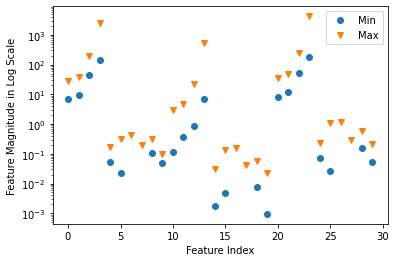

In [37]:
# We can see that there are huge diffrence between min and max and between diffrent features
plt.plot(X_train.min(axis=0), 'o', label='Min')
plt.plot(X_train.max(axis=0), 'v', label='Max')
plt.xlabel('Feature Index')
plt.ylabel('Feature Magnitude in Log Scale')
plt.yscale('log')
plt.legend(loc='upper right')

In [38]:
min_train = X_train.min(axis=0)
max_train = X_train.max(axis=0)

range_train = (X_train - min_train).max(axis=0)

#range_train = (max_train - min_train)

#print (range_train)
#range_train_new = max_train-min_train
#print (range_train_new)

X_train_scaled = (X_train - min_train)/range_train
X_test_scaled = (X_test - min_train)/range_train

print (X_train_scaled.min(axis=0))
print (X_train_scaled.max(axis=0))

print(min_train.shape)





[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
(30,)


In [39]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.979
acc on test dataset: 0.972


In [40]:
svm = SVC(kernel='poly')
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.991
acc on test dataset: 0.958


In [41]:
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.984
acc on test dataset: 0.972


In [50]:
# we did much better now, but now we are underfitting
# to fix it we need change hyper parameters

In [42]:
svm = SVC(kernel='linear', C=1000)
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.995
acc on test dataset: 0.944


In [43]:
svm = SVC(kernel='poly', C=1000)
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 1.000
acc on test dataset: 0.965


In [44]:
svm = SVC(kernel='rbf', C=100000)
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 1.000
acc on test dataset: 0.965


## We need to run a grid-search to find the best hyper-parameter!

In [45]:
for penalty in range(0,20):
    for kernel_function in ['linear', 'rbf', 'poly']:
        svm = SVC(kernel=kernel_function, C=2**penalty)
        svm.fit(X_train_scaled, y_train)
        print('penalty:', 2**penalty, "kernel function", kernel_function, 'acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
        print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

penalty: 1 kernel function linear acc on train dataset: 0.979
acc on test dataset: 0.972
penalty: 1 kernel function rbf acc on train dataset: 0.984
acc on test dataset: 0.972
penalty: 1 kernel function poly acc on train dataset: 0.991
acc on test dataset: 0.958
penalty: 2 kernel function linear acc on train dataset: 0.979
acc on test dataset: 0.958
penalty: 2 kernel function rbf acc on train dataset: 0.986
acc on test dataset: 0.972
penalty: 2 kernel function poly acc on train dataset: 0.991
acc on test dataset: 0.958
penalty: 4 kernel function linear acc on train dataset: 0.979
acc on test dataset: 0.965
penalty: 4 kernel function rbf acc on train dataset: 0.993
acc on test dataset: 0.965
penalty: 4 kernel function poly acc on train dataset: 0.993
acc on test dataset: 0.951
penalty: 8 kernel function linear acc on train dataset: 0.984
acc on test dataset: 0.958
penalty: 8 kernel function rbf acc on train dataset: 0.993
acc on test dataset: 0.965
penalty: 8 kernel function poly acc on 